# Heart Failure Prediction
Dataset downloaded from [here](#https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?select=heart.csv)
## Goals:
- Gain experience working with a medical dataset
- Classifier must have an accuracy of 80% or higher
## Contents:
* [EDA](#EDA)
* [Preprocessing](#Preprocessing)
* [Model Selection and Baseline Testing](#Model-Selection-and-Baseline-Testing)
* [Parameter Tuning](#Parameter-Tuning)
* [Final Testing](#Final-Testing)

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# Check feature cardinality
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### EDA

In [8]:
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Removes warnings in current job (RandomizedSearch CV)
warnings.filterwarnings("ignore")
# Removes warnings in spawned jobs
os.environ['PYTHONWARNINGS']='ignore'
# Set plot size
plt.rcParams['figure.figsize'] = [15, 6]
# Set palette
sns.set_palette('pastel')

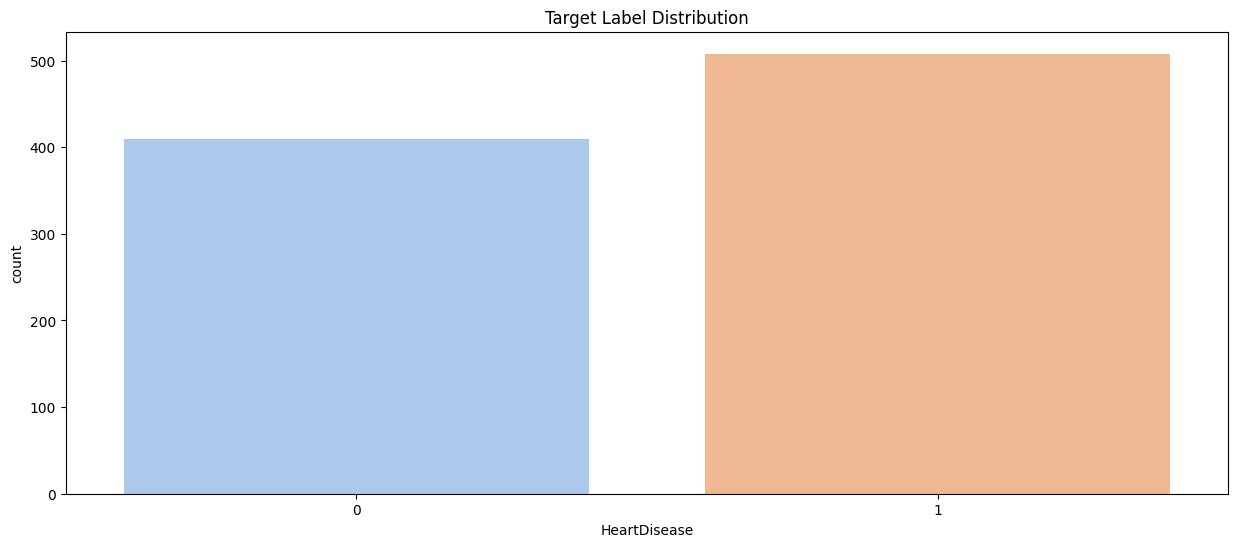

In [9]:
# Target label distribution
plt.title('Target Label Distribution')
sns.countplot(x=df['HeartDisease'])
plt.show()

In [10]:
# Categorical features / Numerical features
cat_cols = df.select_dtypes(include='object').columns

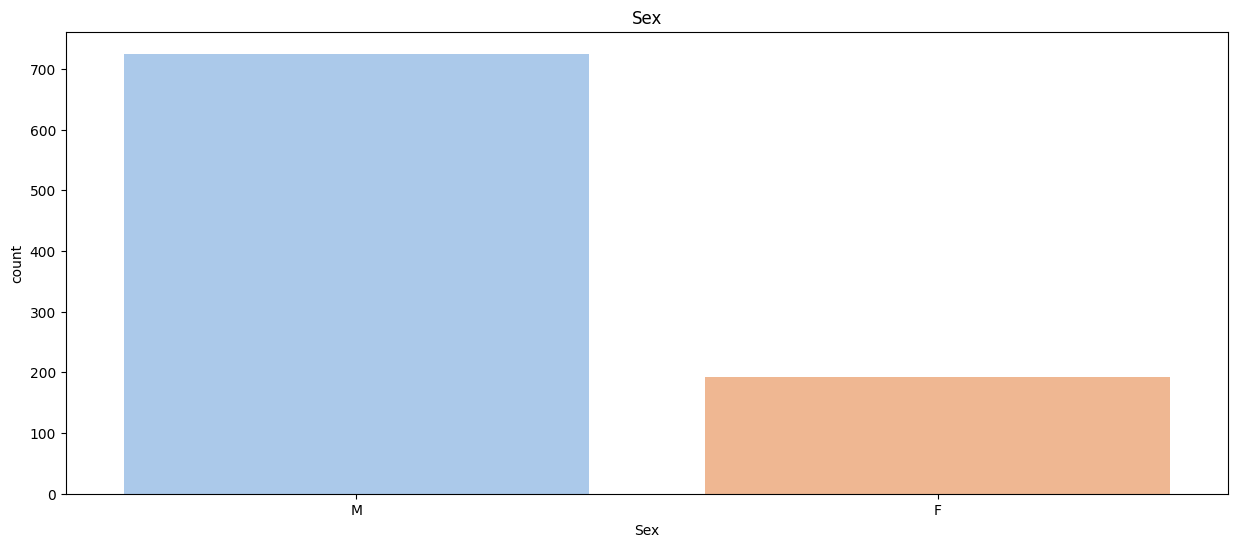

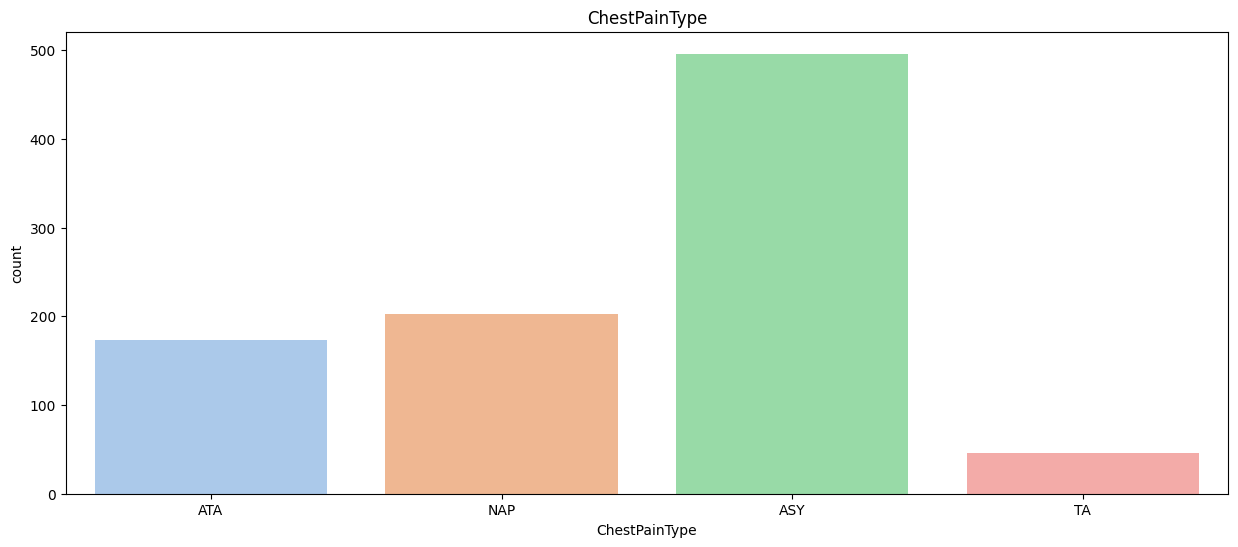

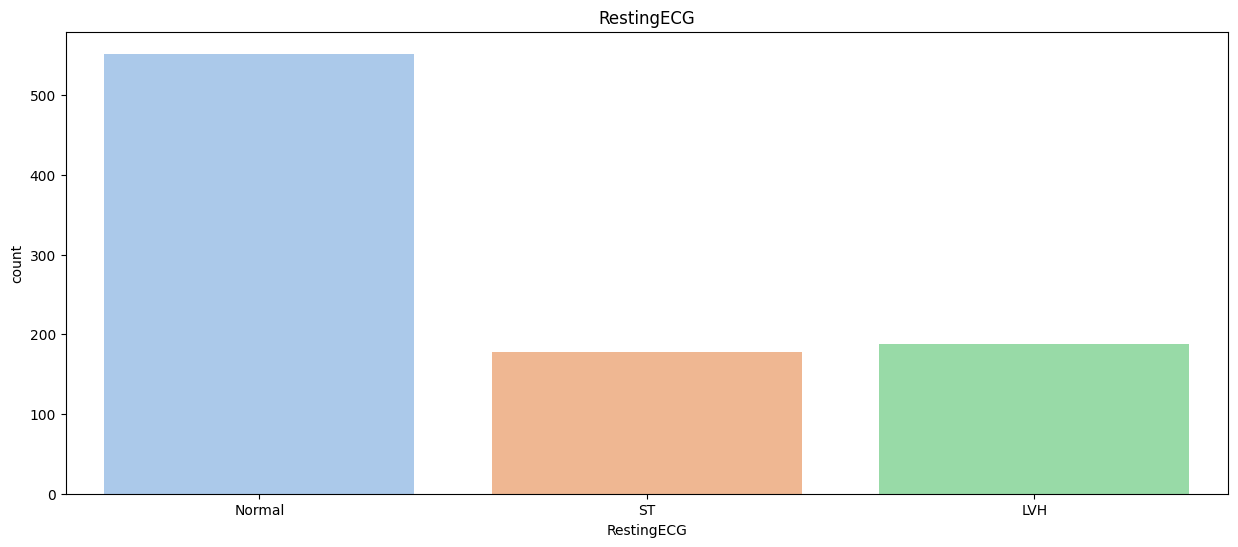

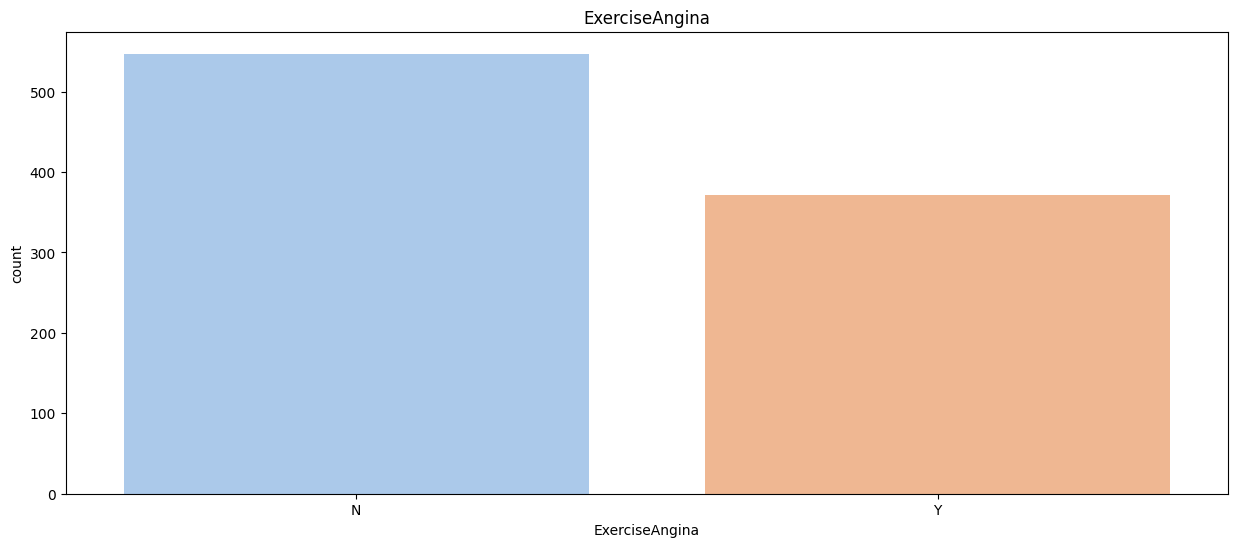

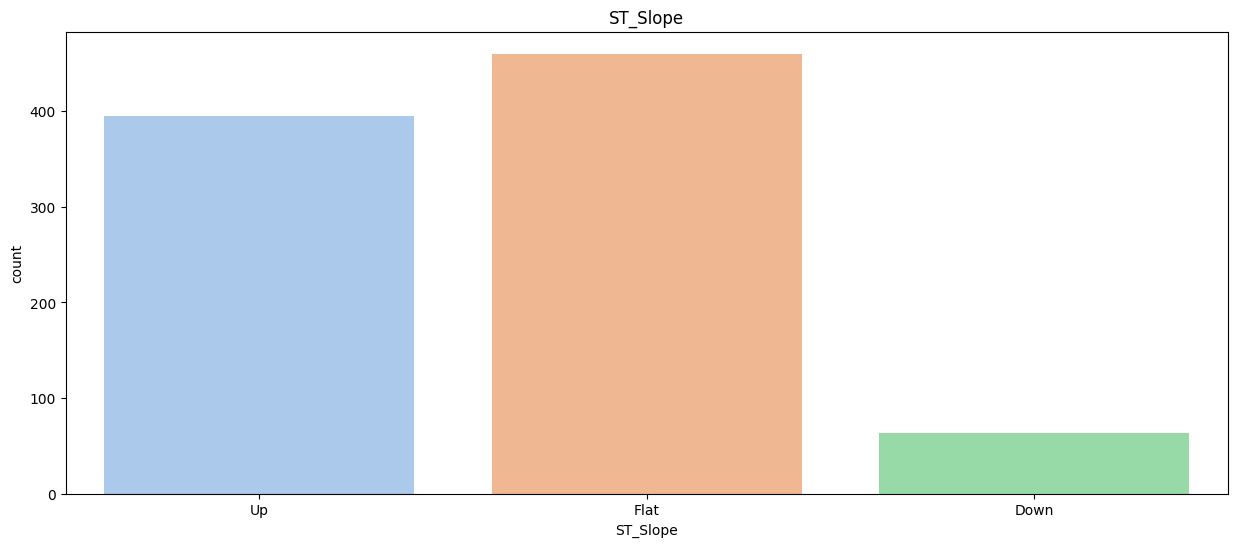

In [11]:
# Categorical value counts
for feature in cat_cols:
    plt.title(feature)
    sns.countplot(x=df[feature])
    plt.show()

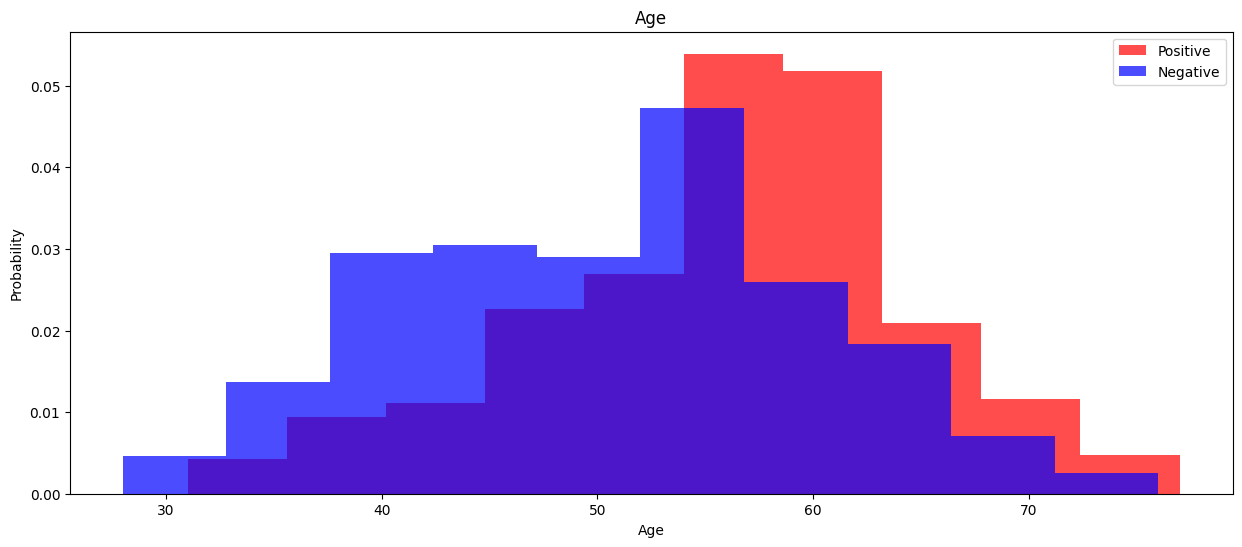

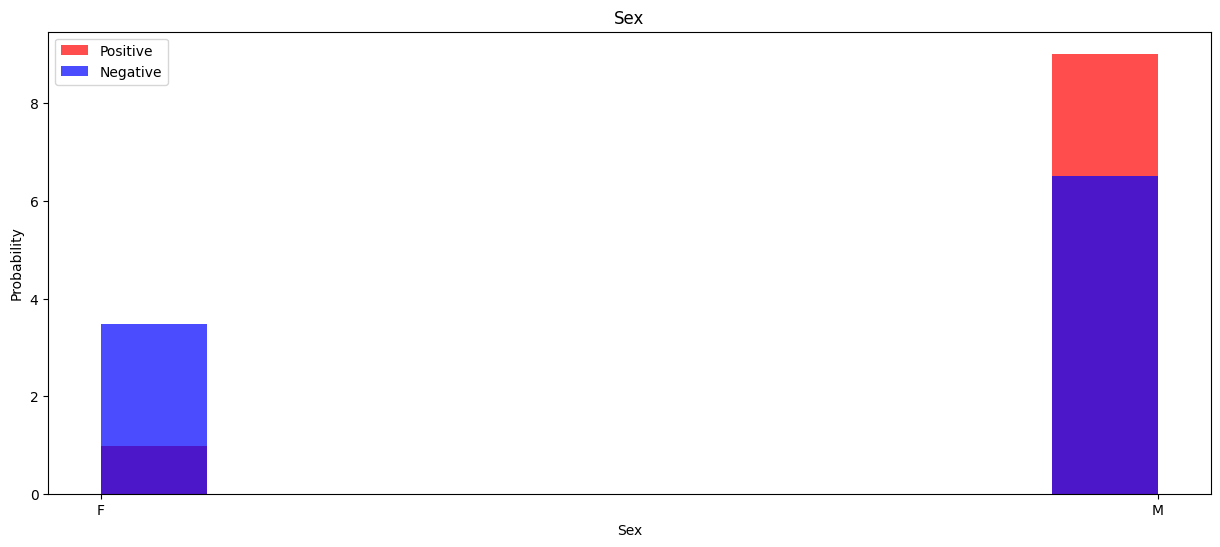

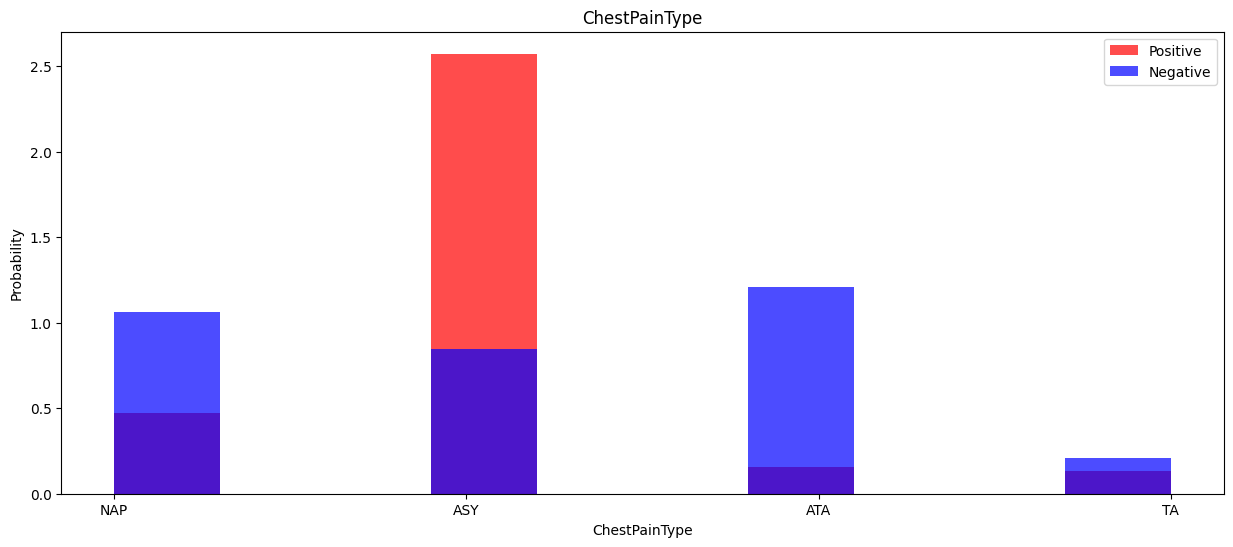

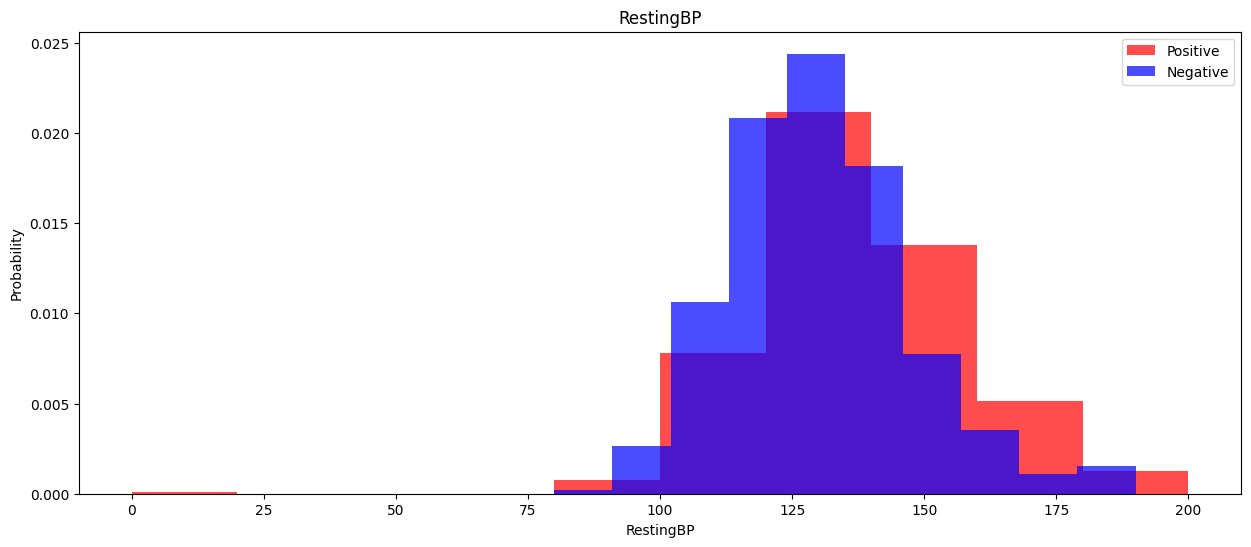

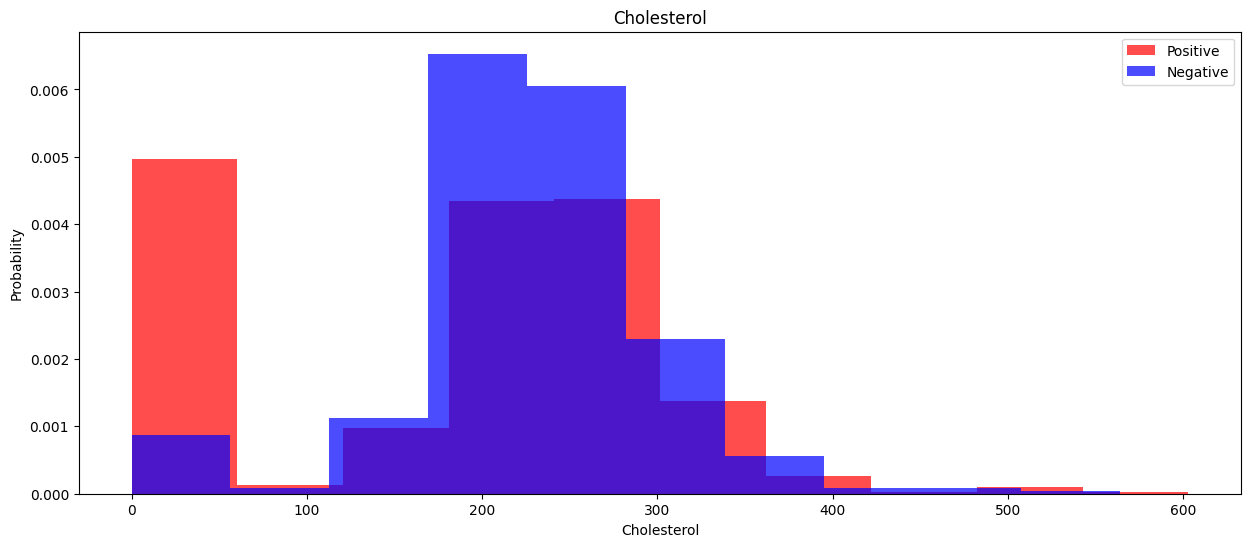

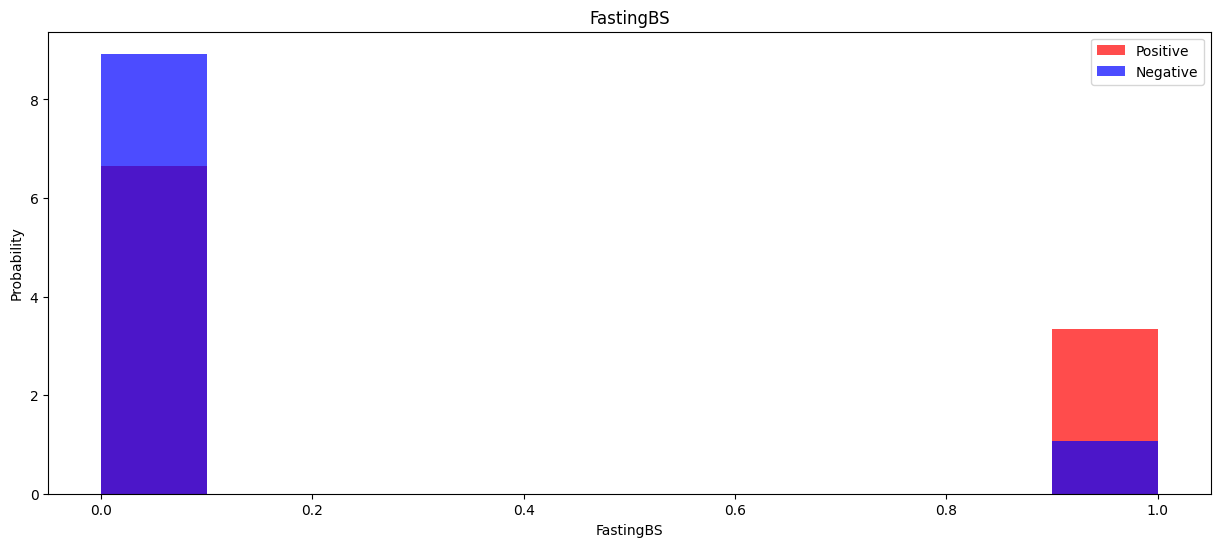

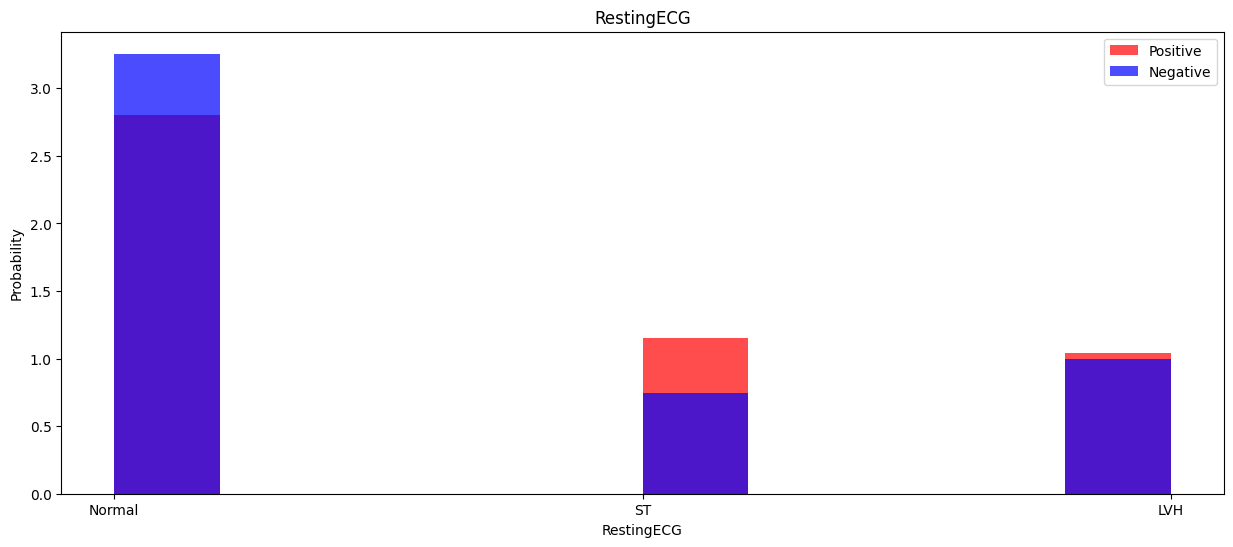

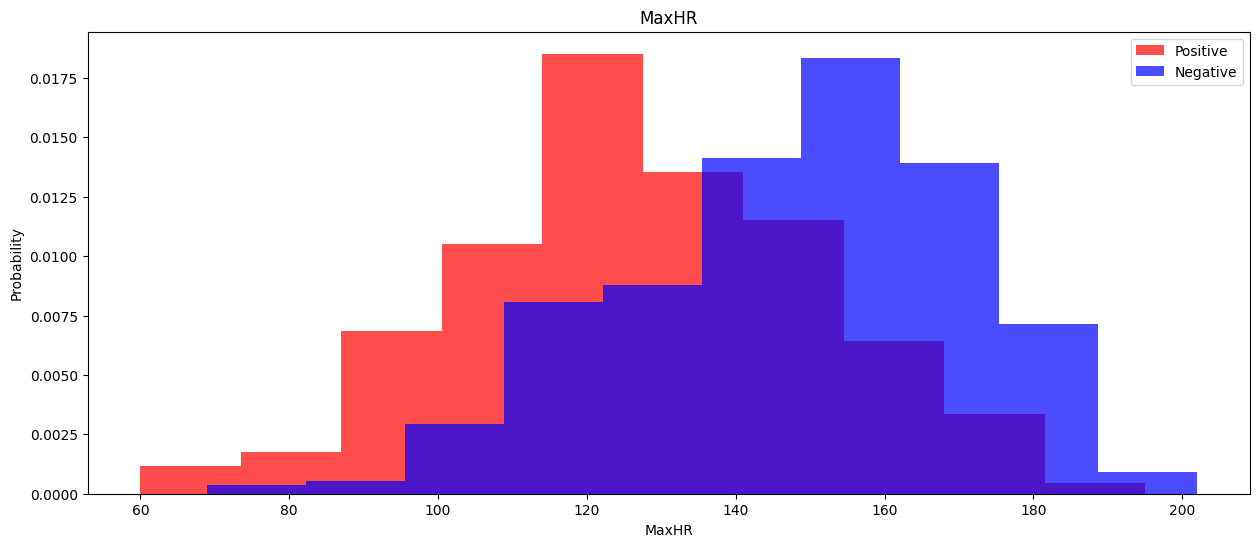

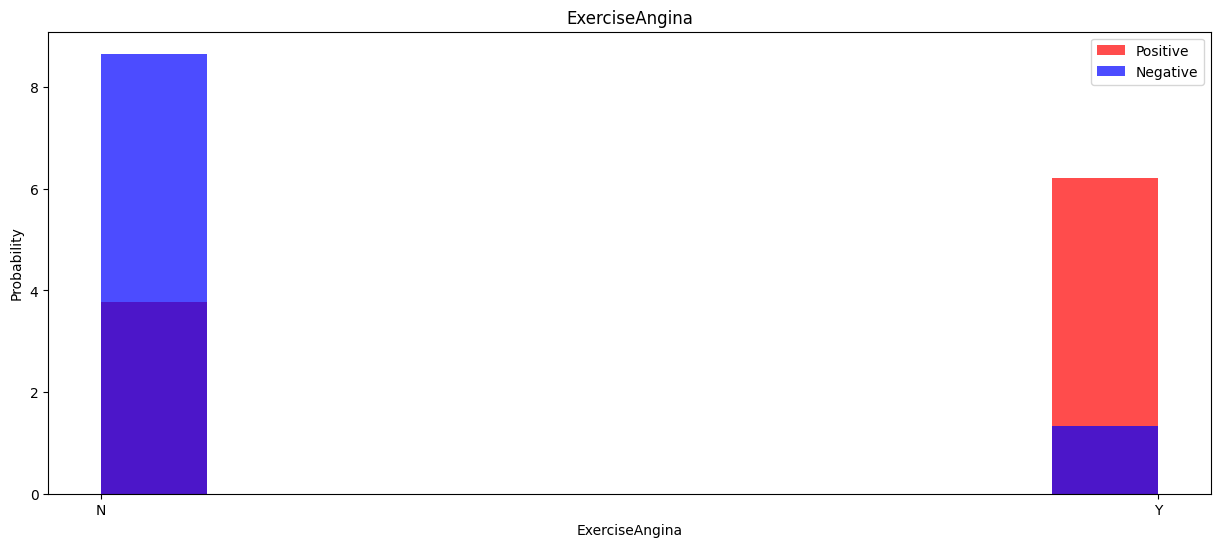

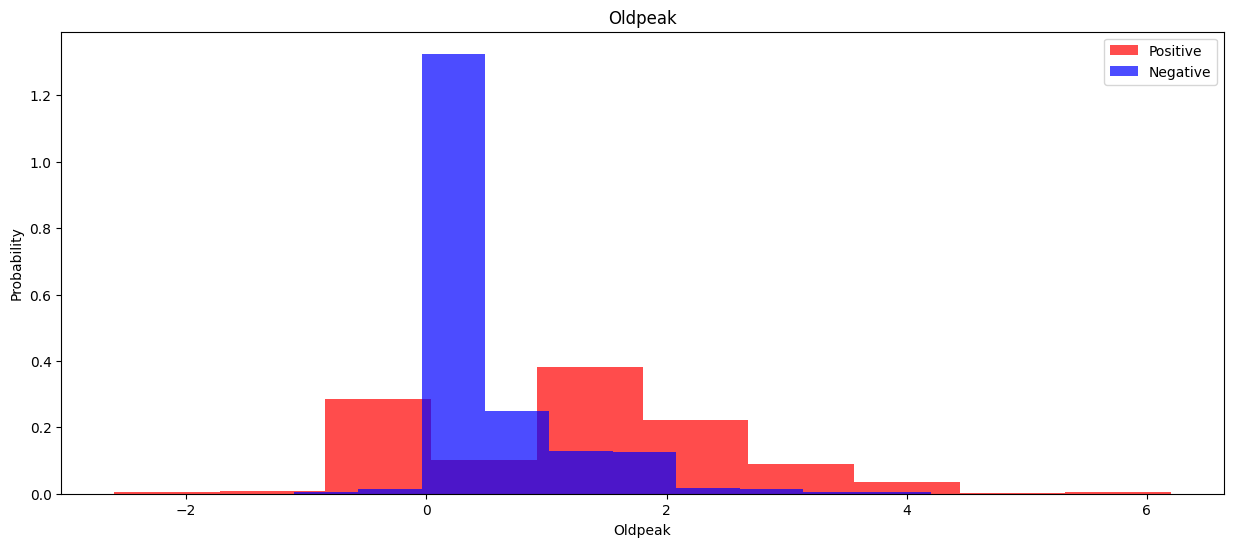

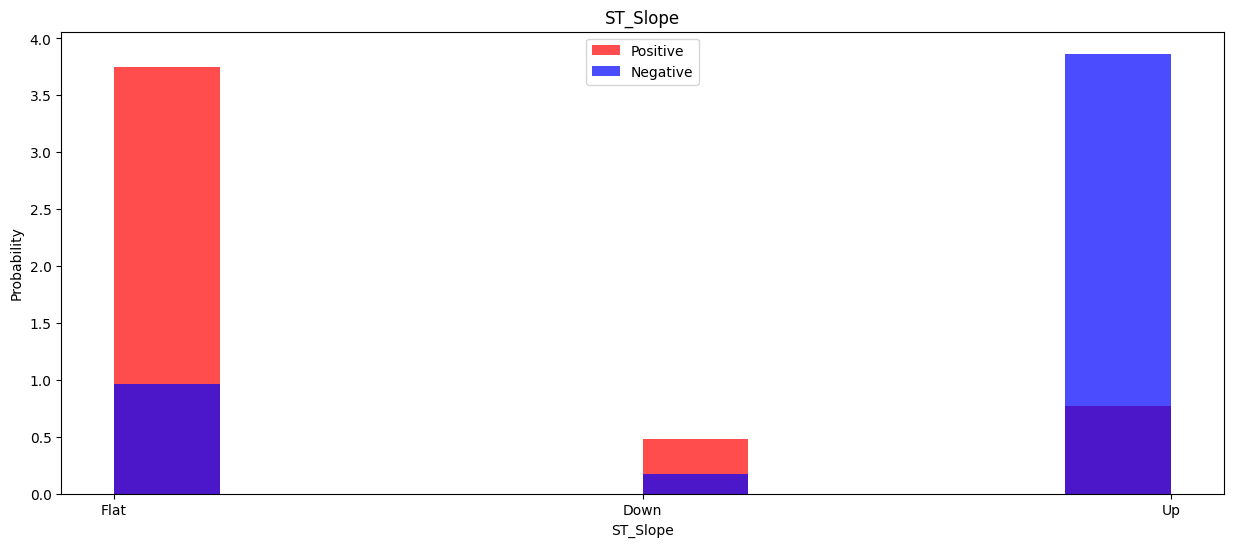

In [12]:
# Target label dataframes
pos = df[df['HeartDisease'] == 1]
neg = df[df['HeartDisease'] == 0]

# Plot histograms comparing each feature with both target label dataframes
for feature in df.columns[:-1]:
    plt.title(feature)
    plt.hist(pos[feature], label='Positive', alpha=0.7, color='r', density=True)
    plt.hist(neg[feature], label='Negative', alpha=0.7, color='b', density=True)
    plt.xlabel(feature)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

### Preprocessing

In [93]:
def preprocessing(dataframe):
    # Make copy of dataset
    x = dataframe.copy()
    
    # Features of interest
    key_features = [
        'ST_Slope',
        'Oldpeak',
        'ExerciseAngina',
        'MaxHR',
        'ChestPainType',
        'Sex',
        'HeartDisease'
    ]
    
    x = x.drop(['RestingECG'], axis=1)
    # OneHot categorical features
    x = onehot_encode(x)

    return x
    

def onehot_encode(dataframe):
    # Creates list of categorical features in dataframe
    columns = dataframe.select_dtypes(include='object').columns
    # Adds prefix to new column title
    prefixes = [x.upper() for x in columns]
    # Creates copy of dataframe to modify
    temp_df = dataframe.copy()
    
    # Loop through each column/prefix and add encoded columns to exisiting dataframe
    for feature, prefix in zip(columns, prefixes):
        encoded = pd.get_dummies(temp_df[feature], prefix=prefix)
        temp_df = pd.concat([temp_df, encoded], axis=1)
    
    # Drop original categorical columns
    temp_df.drop(columns, axis=1, inplace=True)
    return temp_df

In [57]:
df_pre = preprocessing(df)

In [58]:
df_pre.head(1)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,SEX_F,SEX_M,CHESTPAINTYPE_ASY,CHESTPAINTYPE_ATA,CHESTPAINTYPE_NAP,CHESTPAINTYPE_TA,EXERCISEANGINA_N,EXERCISEANGINA_Y,ST_SLOPE_Down,ST_SLOPE_Flat,ST_SLOPE_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,1,0,0,0,1


### Data Prep

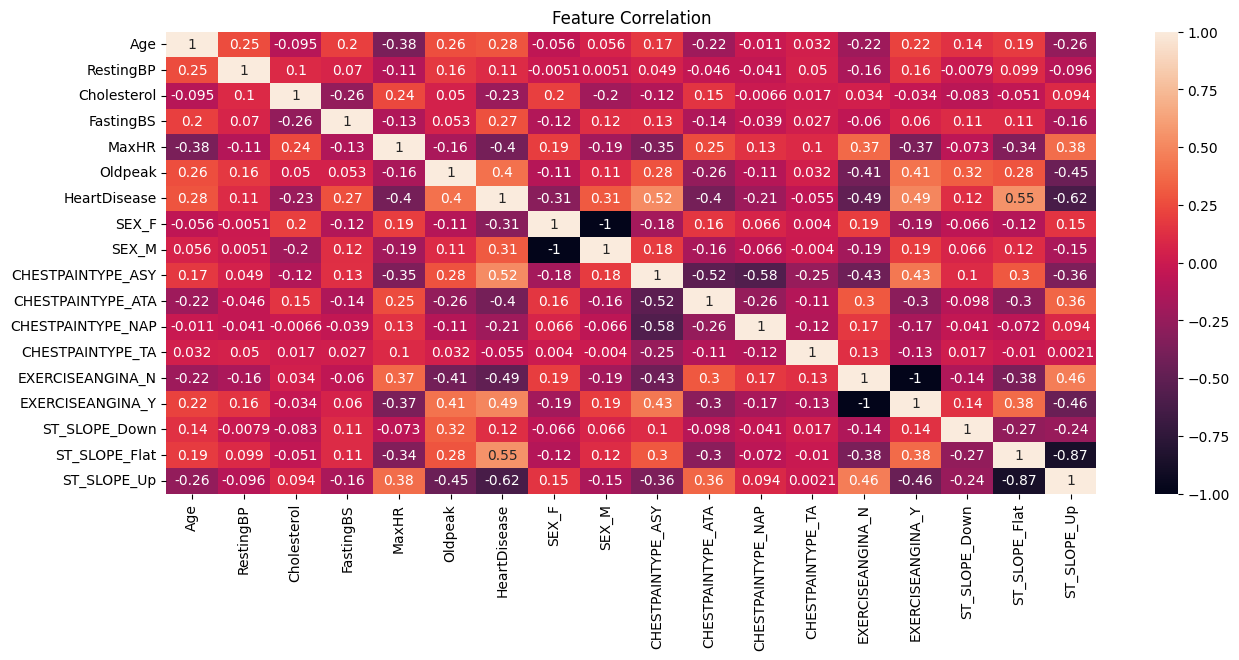

In [59]:
# Feature correlation
plt.title('Feature Correlation')
sns.heatmap(df_pre.corr(), annot=True, cmap='rocket')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X, y = df_pre.drop(['HeartDisease'], axis=1), df_pre['HeartDisease']

In [62]:
# Split dataset
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.30, random_state=42)
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.15, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_cv shape: {X_cv.shape}")
print(f"y_cv shape: {y_cv.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (642, 17)
y_train shape: (642,)
X_cv shape: (234, 17)
y_cv shape: (234,)
X_test shape: (42, 17)
y_test shape: (42,)


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
s = StandardScaler()

In [65]:
# Standardize training/CV set
X_train = pd.DataFrame(s.fit_transform(X_train), columns=X_train.columns)
X_cv = pd.DataFrame(s.transform(X_cv), columns=X_cv.columns)

In [66]:
X_train.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,SEX_F,SEX_M,CHESTPAINTYPE_ASY,CHESTPAINTYPE_ATA,CHESTPAINTYPE_NAP,CHESTPAINTYPE_TA,EXERCISEANGINA_N,EXERCISEANGINA_Y,ST_SLOPE_Down,ST_SLOPE_Flat,ST_SLOPE_Up
0,0.464714,-1.772314,0.294989,-0.525682,0.774609,-0.729460,-0.544949,0.544949,0.901975,-0.489267,-0.520852,-0.209529,0.830346,-0.830346,-0.254316,-1.025241,1.158907
1,0.781767,-1.234868,-1.905390,1.902289,-1.173673,0.990283,-0.544949,0.544949,0.901975,-0.489267,-0.520852,-0.209529,-1.204318,1.204318,3.932116,-1.025241,-0.862882


In [67]:
X_cv.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,SEX_F,SEX_M,CHESTPAINTYPE_ASY,CHESTPAINTYPE_ATA,CHESTPAINTYPE_NAP,CHESTPAINTYPE_TA,EXERCISEANGINA_N,EXERCISEANGINA_Y,ST_SLOPE_Down,ST_SLOPE_Flat,ST_SLOPE_Up
0,1.204504,1.989803,0.567686,1.902289,-1.011316,0.990283,-0.544949,0.544949,0.901975,-0.489267,-0.520852,-0.209529,-1.204318,1.204318,-0.254316,0.975381,-0.862882
1,-0.803497,-0.697423,0.699332,-0.525682,-0.483656,0.085155,-0.544949,0.544949,0.901975,-0.489267,-0.520852,-0.209529,-1.204318,1.204318,-0.254316,0.975381,-0.862882


### Model Selection and Baseline Testing

In [68]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [69]:
models = {
    'XGB': XGBClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoost': GradientBoostingClassifier(),
    'LogisticReg': LogisticRegression()
}

In [70]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, log_loss, confusion_matrix

In [71]:
# Feature importance
def plot_feature_importance(importances, feature_names, model):
    pd.Series(importances, index=feature_names).plot(kind='barh')
    plt.title(f"{model} Feature Importance")
    plt.show()

Accuracy score: 0.8461538461538461
Recall score: 0.8308823529411765
Precision score: 0.8968253968253969
Log loss: 0.4349060345451122
ROC AUC: 0.9257953181272509


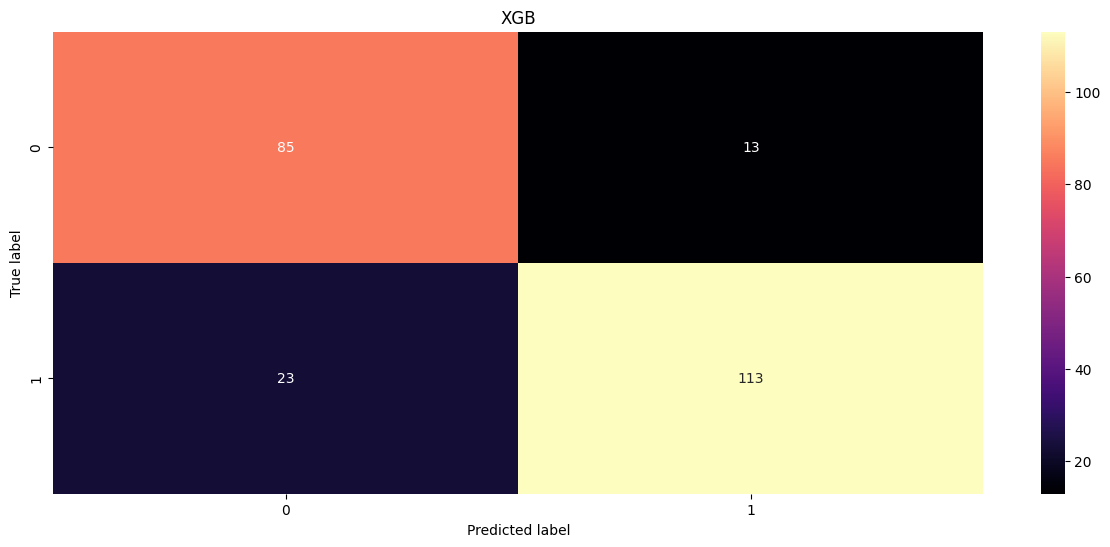

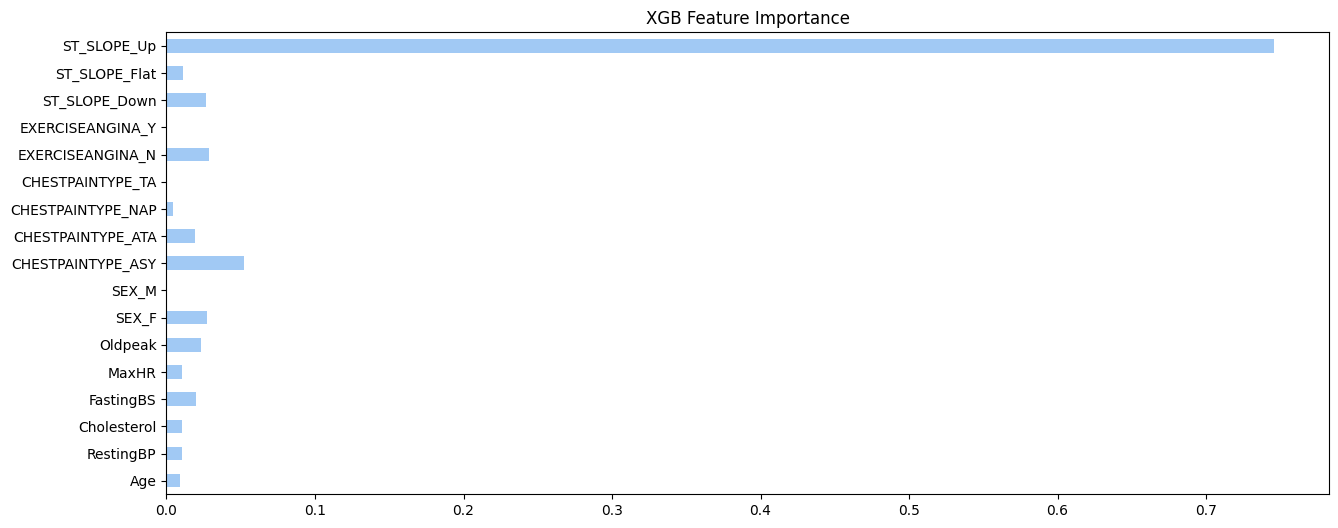

Accuracy score: 0.8974358974358975
Recall score: 0.9117647058823529
Precision score: 0.9117647058823529
Log loss: 0.3378681138968614
ROC AUC: 0.937800120048019


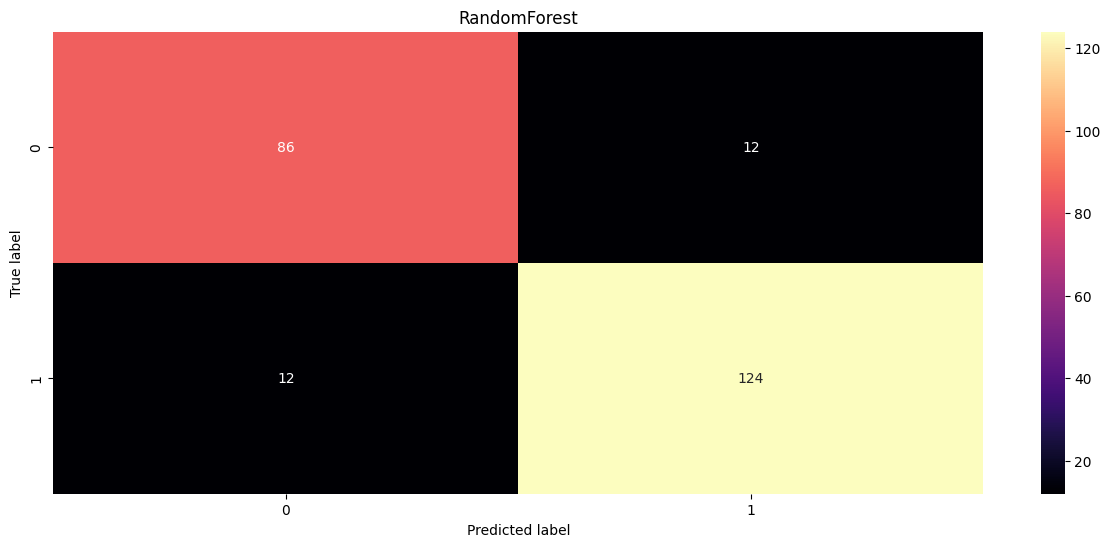

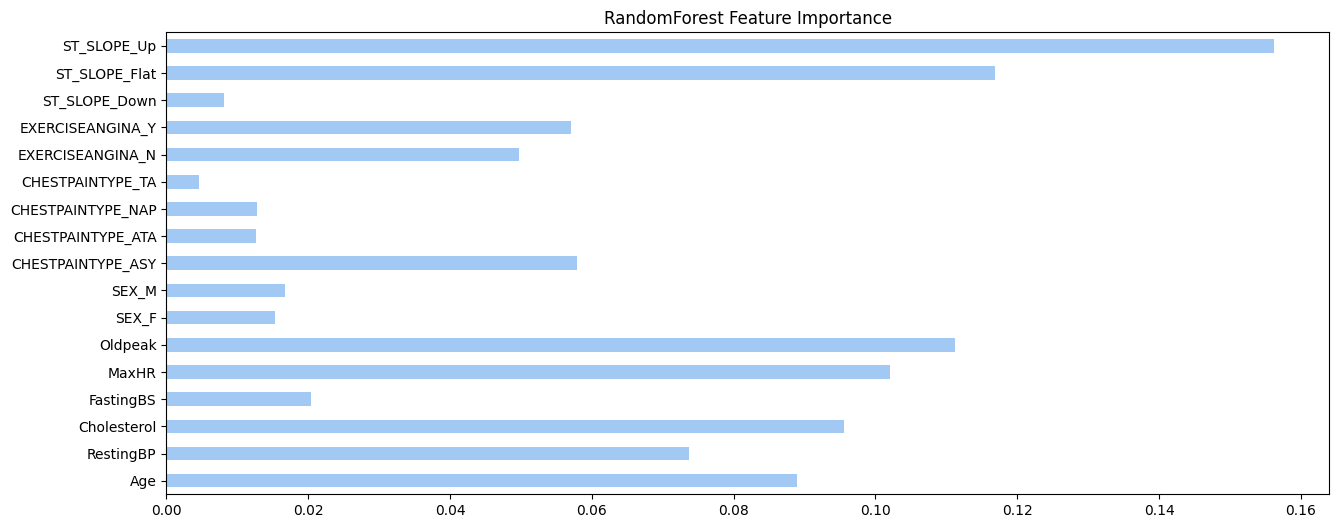

Accuracy score: 0.8717948717948718
Recall score: 0.8529411764705882
Precision score: 0.9206349206349206
Log loss: 0.3343227462601696
ROC AUC: 0.9350240096038416


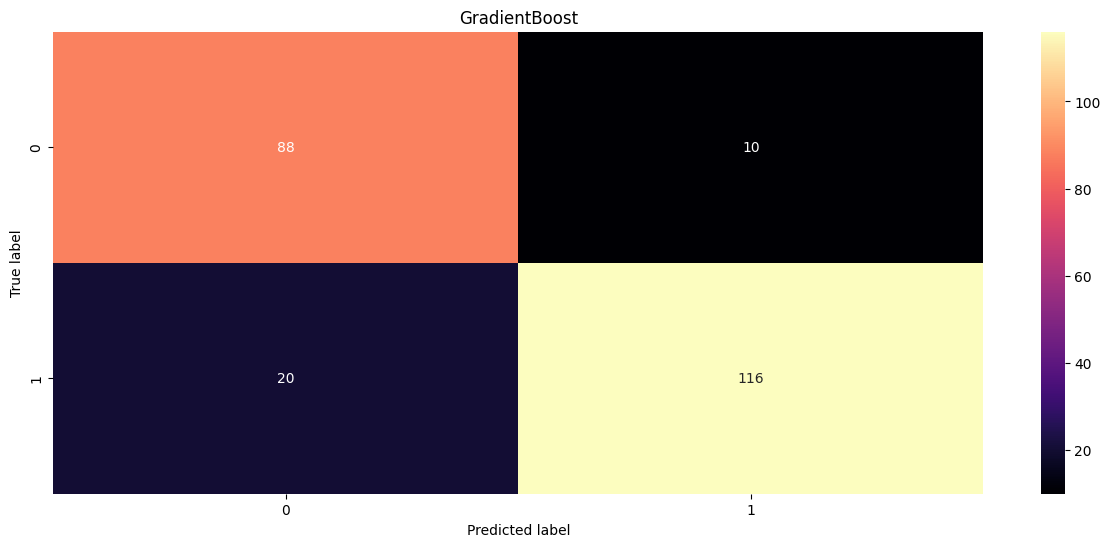

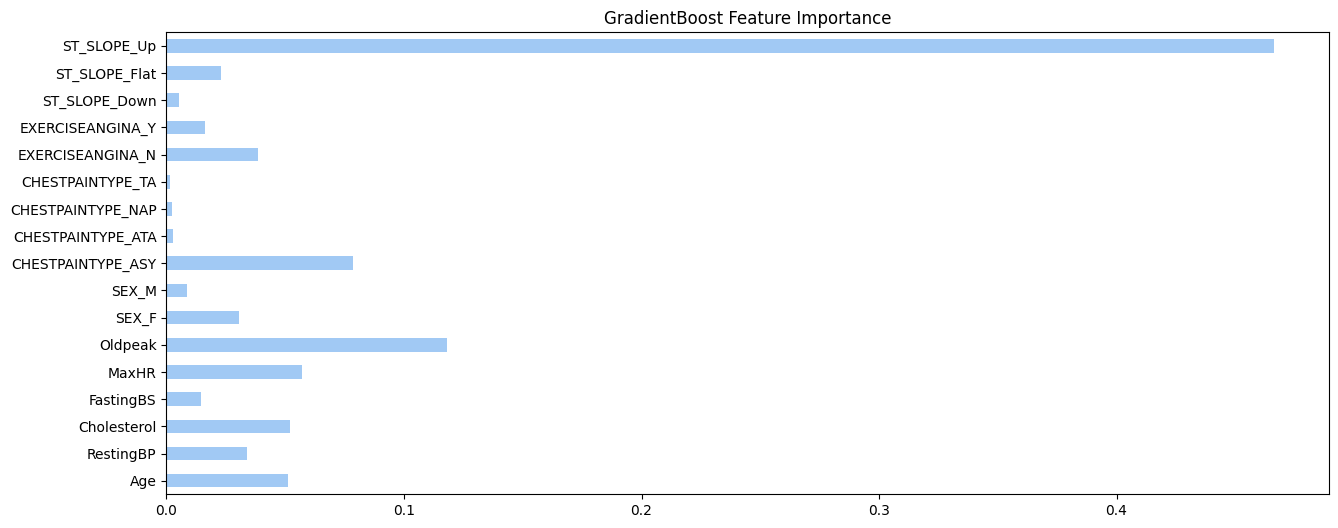

Accuracy score: 0.8888888888888888
Recall score: 0.8823529411764706
Precision score: 0.9230769230769231
Log loss: 0.3161470036702944
ROC AUC: 0.9435024009603842


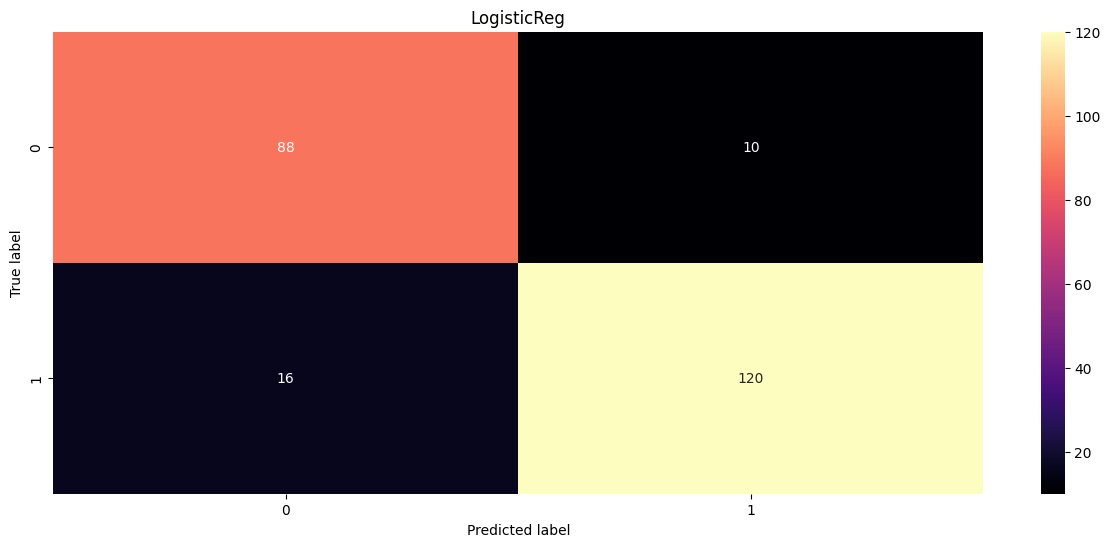

In [72]:
# Determine baseline for each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_cv)
    y_probas = model.predict_proba(X_cv)
    
    # Display metrics
    print(f"Accuracy score: {accuracy_score(y_cv, y_pred)}")
    print(f"Recall score: {recall_score(y_cv, y_pred)}")
    print(f"Precision score: {precision_score(y_cv, y_pred)}")
    print(f"Log loss: {log_loss(y_cv, y_probas)}")
    print(f"ROC AUC: {roc_auc_score(y_cv, y_probas[:, 1])}")
    
    # Plot confusion matrix
    cm = confusion_matrix(y_cv, y_pred)
    plt.title(name)
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
    # Plot feature importance if available
    if name != 'LogisticReg':
        feature_names = X_train.columns
        importances = model.feature_importances_
        plot_feature_importance(importances, feature_names, name)

### Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [74]:
model_params = {
    # XBG parameters
    'XGB': {
        'learning_rate': [0.05, 0.10, 0.15, 0.30],
        'max_depth': np.arange(1, 16, 5),
        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
        'colsample_bytree': [0.3, 0.4, 0.5, 0.7]
    },

    # RandomForest parameters
    'RandomForest': {
        'criterion': ['entropy', 'gini'],
        'max_depth': range(2, 21, 5),
        'max_features': ['auto', 'sqrt', 'log2'],
        'n_estimators': [90, 100, 130, 150]
    },

    # LogisticReg parameters 
    'LogisticReg': {
        'C': np.logspace(-9, 9, 30),
        'penalty': ['l2', 'l1', 'none', 'elasticnet'],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
        'max_iter': [10000]
    },
    
    # GradientBooster parameters
    'GradientBoost': {
        'learning_rate': [1, 0.5, 0.01],
        'n_estimators': [1, 2, 4, 6, 100],
        'max_depth': range(5, 9),
        'max_features': list(range(1, X_train.shape[1]))
    }
}

In [75]:
fitted_models = {}

for name, model in models.items():
    print(f"Fitting {name}...")
    try:
        random_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=model_params[name],
            n_iter=300,
            scoring='accuracy',
            n_jobs=-1,
            cv=5,
            verbose=True
        )
        random_search.fit(X_train, y_train)
    except Exception as e:
        print(f"ERROR from {name}: {e}")
    
    # Run best fitted model on X_cv
    best_clf = random_search.best_estimator_
    best_clf.fit(X_train, y_train)
    y_pred = best_clf.predict(X_cv)
    y_probas = best_clf.predict_proba(X_cv)
    
    # Store estimator in fitted_model
    fitted_models[name] = {
        'model': random_search.best_estimator_,
        'score': random_search.best_score_
        }
    
    # Display metrics
    print(f"\nCV score: {random_search.best_score_}")
    print(f"Accuracy score: {accuracy_score(y_cv, y_pred)}")
    print(f"Recall score: {recall_score(y_cv, y_pred)}")
    print(f"Precision score: {precision_score(y_cv, y_pred)}")
    print(f"Log loss: {log_loss(y_cv, y_probas)}")
    print(f"ROC AUC: {roc_auc_score(y_cv, y_probas[:, 1])}\n")

print(f"\nFitting complete!")

Fitting XGB...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits

CV score: 0.8675387596899224
Accuracy score: 0.8717948717948718
Recall score: 0.875
Precision score: 0.9015151515151515
Log loss: 0.33365870703625855
ROC AUC: 0.9357743097238894

Fitting RandomForest...
Fitting 5 folds for each of 96 candidates, totalling 480 fits

CV score: 0.8737766472868216
Accuracy score: 0.8717948717948718
Recall score: 0.8529411764705882
Precision score: 0.9206349206349206
Log loss: 0.3351739097878357
ROC AUC: 0.9362244897959184

Fitting GradientBoost...
Fitting 5 folds for each of 300 candidates, totalling 1500 fits

CV score: 0.8691375968992248
Accuracy score: 0.8803418803418803
Recall score: 0.9044117647058824
Precision score: 0.8913043478260869
Log loss: 0.4116731712219124
ROC AUC: 0.9438025210084033

Fitting LogisticReg...
Fitting 5 folds for each of 300 candidates, totalling 1500 fits

CV score: 0.8566618217054263
Accuracy score: 0.8760683760683761
Recall score: 0.86764705882352

In [76]:
def grid_search(name, model, model_params, X, y):
    print(f"Fitting {name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=model_params,
        scoring='accuracy',
        n_jobs=-1,
        cv=5,
        verbose=True
    )
    
    grid_search.fit(X, y)
    
    best_clf = grid_search.best_estimator_
    best_clf.fit(X, y)
    y_pred = best_clf.predict(X_cv)
    y_probas = best_clf.predict_proba(X_cv)
    
    
    print(f"\nCV score: {grid_search.best_score_}")
    print(f"Accuracy score: {accuracy_score(y_cv, y_pred)}")
    print(f"Recall score: {recall_score(y_cv, y_pred)}")
    print(f"Precision score: {precision_score(y_cv, y_pred)}")
    print(f"Log loss: {log_loss(y_cv, y_probas)}")
    print(f"ROC AUC: {roc_auc_score(y_cv, y_probas[:, 1])}\n")
    print(f"Fitting complete!")
    
    return grid_search.best_estimator_


# Model to test
model_name = 'GradientBoost'
best_model = grid_search(model_name, models[model_name], model_params[model_name], X_train, y_train)

Fitting GradientBoost...
Fitting 5 folds for each of 960 candidates, totalling 4800 fits

CV score: 0.8691133720930232
Accuracy score: 0.8931623931623932
Recall score: 0.9044117647058824
Precision score: 0.9111111111111111
Log loss: 0.4163875400631552
ROC AUC: 0.9449279711884754

Fitting complete!


### Final Testing

In [77]:
import pickle

In [78]:
def save_model(model):
    with open('model.pkl', 'wb') as f:
        pickle.dump(model, f)

def load_model(file):
    with open('model.pkl', 'rb') as f:
        return pickle.load(f)

In [86]:
# Save model
save_model(fitted_models['GradientBoost']['model'])

# Load model
final_clf = load_model('model.pkl')

In [87]:
final_clf

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features=1)

In [88]:
# Prep test set
final_test = pd.DataFrame(s.transform(X_test), columns=X_test.columns)
final_test.head(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,SEX_F,SEX_M,CHESTPAINTYPE_ASY,CHESTPAINTYPE_ATA,CHESTPAINTYPE_NAP,CHESTPAINTYPE_TA,EXERCISEANGINA_N,EXERCISEANGINA_Y,ST_SLOPE_Down,ST_SLOPE_Flat,ST_SLOPE_Up
0,-0.169391,-0.697423,-0.193984,-0.525682,0.531074,-0.819972,-0.544949,0.544949,0.901975,-0.489267,-0.520852,-0.209529,0.830346,-0.830346,-0.254316,0.975381,-0.862882
1,0.253346,-0.159978,0.172746,-0.525682,1.058733,-0.819972,-0.544949,0.544949,-1.108678,2.043874,-0.520852,-0.209529,0.830346,-0.830346,-0.254316,-1.025241,1.158907


In [89]:
# Fit model
final_clf.fit(X_train, y_train)
y_pred = final_clf.predict(final_test)
y_probas = final_clf.predict_proba(final_test)

In [90]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred)}")
print(f"Log loss: {log_loss(y_test, y_probas)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_probas[:, 1])}")

Accuracy score: 0.9047619047619048
Recall score: 0.9285714285714286
Precision score: 0.9285714285714286
Log loss: 0.3858801040924462
ROC AUC: 0.9744897959183674


In [91]:
# GridSearchCV model
best_model.fit(X_train, y_train)
y_pred = best_model.predict(final_test)
y_probas = best_model.predict_proba(final_test)

In [92]:
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")
print(f"Recall score: {recall_score(y_test, y_pred)}")
print(f"Precision score: {precision_score(y_test, y_pred)}")
print(f"Log loss: {log_loss(y_test, y_probas)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_probas[:, 1])}")

Accuracy score: 0.9285714285714286
Recall score: 0.9642857142857143
Precision score: 0.9310344827586207
Log loss: 0.4054067058537053
ROC AUC: 0.9566326530612246


In [94]:
# Save GRCV model
save_model(best_model)

In [95]:
load_model('model.pkl')

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, max_features=1)